In [ ]:
from datetime import datetime, timedelta, timezone

jst_tz = timezone(timedelta(hours=9), 'JST')

jh = timedelta(hours=9)
thb = timedelta(hours=240)
utc = datetime.now()
dt =datetime(2019, 1, 1, 12)
jst = utc + jh
before_1h = jst - thb
print(thb)
ago = dt - thb
now_str = jst.strftime('%Y-%m-%d %H:%M:%S')
before_1h_str = before_1h.strftime('%Y-%m-%d %H:%M:%S')

dt_str = dt.strftime('%Y-%m-%d %H:%M:%S')
ago_str = ago.strftime('%Y-%m-%d %H:%M:%S')
print(now_str,before_1h_str)
display(dt_str,ago_str)

In [25]:
import twint
import nest_asyncio
import pandas as pd
from datetime import datetime

#これないとエラーが出る・・・・
nest_asyncio.apply()
output_filename = "twintfic1_scrape.csv"

c = twint.Config()
c.Search = "ラヴィドリュクス"
c.Store_csv = True
c.Output = output_filename #上記アウトプットするJSONファイルの名前
c.Since = before_1h_str
c.Until = now_str
c.Hide_output = False
twint.run.Search(c)

1440949272292184069 2021-09-23 08:00:52 +0000 <cute2candy_tk> レジン道@resindou1 さまで注文した資材が届きました♡ レジン苦手なんですが、きちんと作れるようになりたくて時間作って練習します✨  https://t.co/RDYLEK3dVq
1440949103907594241 2021-09-23 08:00:12 +0000 <yuiemi3> 『#ラヴィドリュクス さま』 #吉祥寺PARCO  ４階  只今、ラヴィドリュクスさまにて、 店頭販売＆通販開催中🤗 @LaVie_de_Luxe 『スクエアショートケーキ』 『ハート苺のネックレス』 チェーン:50cm＋アジャスター5cm  現在、ラヴィドリュクスさまのみでの お取り扱い作品です(◕ᴗ◕✿)  #ロリータ  https://t.co/IznK8lHPci
1440946321431564291 2021-09-23 07:49:09 +0000 <hyakkido_aruji> なんかミスってる気がするので明日にしよう
1440943232616075271 2021-09-23 07:36:52 +0000 <marine1402> ♦️ラヴィドリュクス♦️吉祥寺PARCO  店頭の画像をいただきました💐 ちょっと豪華なブローチもあります✨  通販の対応もしてくださいますので、気になる作品がありましたらラヴィさん（@LaVie_de_Luxe)までDMにてお問い合わせくださいね✨  https://t.co/QNhENN2j62
1440938054760288260 2021-09-23 07:16:18 +0000 <choumusu> 🕊委託店舗様のご紹介🕊 東京は #吉祥寺パルコ 4F #ラヴィドリュクス へどうぞ🕊 営業時間 / 10:00〜20:00 特設催事場  主催▼ @LaVie_de_Luxe / (店頭 @LV_information )  通販詳細▼ まずはラヴィDMへ、ご希望を添えてご連絡くださいませ📩  https://t.co/LM6MKEhMqB  https://t.co/L7zcAC6O9A
1440935849881837577 2021-09-23 07:07:32 +0000 <chih

In [ ]:
import twint
import nest_asyncio
import pandas as pd
from datetime import datetime

#これないとエラーが出る・・・・
nest_asyncio.apply()

with open('user.txt', 'r') as f:
    user_list = f.read().split(",")

#hako_df = pd.DataFrame()
output_filename = "twint_scrape.csv"

for i,twi in enumerate(user_list):
    try:
        c = twint.Config()
        c.Username = twi#解析するユーザー名
        #c.Store_json = True # Store_csvもあるがカラム名が入らなかったため不採用
        c.Store_csv = True
        c.Output = output_filename #上記アウトプットするJSONファイルの名前
        c.Since = before_1h_str#"2019-01-01 00:00:00" #ここから
        c.Until = now_str#"2021-09-01 00:00:00" #ここまで
        #c.Limit = 1
        #c.Pandas = True #出力形式をPandasにする
        c.Hide_output = False # False にするとツイートがターミナルに出力
        twint.run.Search(c)
    except ValueError:
        continue
        #df = twint.storage.panda.Tweets_df #データフレーム形式へ変換
        #Tweets_df = df['tweet'].to_frame() #tweetカラムのみデータフレーム形式で抽出
        #hako_df = pd.concat([hako_df, Tweets_df], axis=0)
'''
tweets_list = Tweets_df['tweet'].tolist() #tweetカラムをlist化して抽出しておく
a = list(Tweets_df.loc[: , "tweet"])
display(Tweets_df.loc[: , "tweet"])
'''

In [26]:
import pandas as pd
df = pd.read_csv('twintfic1_scrape.csv', encoding="utf-8")
Tweets_df = df.loc[: , "tweet"]
#display(Tweets_df)
with open('stop.txt', 'r') as f:
    stop_list = f.read().split(",")

In [27]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import *
from janome.charfilter import *

#形態素解析器の設定
char_filters = [UnicodeNormalizeCharFilter(), RegexReplaceCharFilter(r"[IiⅠｉ?.*/~=()〝 <>:：《°!！!？（）-]+", "")]
t = Tokenizer()
token_filters = [POSKeepFilter(["名詞"]), POSStopFilter(["名詞,非自立", "名詞,数", "名詞,代名詞", "名詞,接尾"]),LowerCaseFilter()]
analyzer = Analyzer(char_filters=char_filters, token_filters=token_filters)

Tweets_df = Tweets_df.apply(lambda x: " ".join([token.surface for token in analyzer.analyze(x)]))
Tweets_df = pd.DataFrame(Tweets_df)
text = ""
for i,data in enumerate(Tweets_df.loc[:,"tweet"]):
    text = text + data + ""

word_txt = {}
lines = text.split("\r\n")
for line in lines:
    malist = t.tokenize(line)
    for w in malist:
        word = w.surface#4---単語情報の読込
        ps = w.part_of_speech #5---品詞情報の読込
        if ps.find('名詞') < 0: continue #6---名詞のカウント
        if not word in word_txt:
            word_txt[word] = 0
        word_txt[word] += 1 #7---カウント
#8---頻出単語の表示
keys = sorted(word_txt.items(), key=lambda x:x[1], reverse=True)
print(type(keys))

for word,cnt in keys:
    if any([word == i for i in stop_list]):
        continue
    elif word == ",":
        continue
    else:
        print("{0}({1}) ".format(word,cnt), end="")
        print()

<class 'list'>
ラヴィドリュクス(531) 
ゴスロリマーケット(293) 
吉祥寺(238) 
通販(228) 
委託(153) 
作品(151) 
lave(149) 
de(149) 
luxe(141) 
parco(121) 
税込(112) 
ブース(101) 
販売(95) 
お迎え(92) 
♡(79) 
ネックレス(71) 
納品(66) 
¥(63) 
原宿(62) 
店頭(60) 
パルコ(57) 
問い合わせ(56) 
品書き(56) 
イヤリング(56) 
クエスト(55) 
苺(54) 
ホール(54) 
✨#(52) 
開催(48) 
カワスタ(45) 
催事(44) 
ピアス(43) 
cm(40) 
お披露目(37) 
ご覧(36) 
新宿(35) 
速報(35) 
ハート(34) 
ラヴィ(34) 
アルタ(34) 
mnne(34) 
利用(33) 
チェーン(32) 
アジャスター(32) 
stars(32) 
写真(32) 
花(31) 
♪(30) 
薔薇(29) 
新作(29) 
土(29) 
+(28) 
店舗(28) 
イベント(28) 
ブローチ(27) 
みゆき(27) 
開始(27) 
glm(27) 
リング(26) 
素敵(26) 
ロリータ(24) 
耳飾り(24) 
フラワー(24) 
&(23) 
バレッタ(23) 
❣(22) 
楽しみ(22) 
名古屋(22) 
在庫(21) 
問合せ(21) 
シリーズ(21) 
展開(21) 
対応(20) 
t(20) 
リボン(20) 
宝石(20) 
アイドール(20) 
黒(20) 
マニキュア(20) 
クリップ(19) 
白(19) 
色(19) 
取り扱い(18) 
ピンク(18) 
種類(18) 
うさぎ(18) 
ガーリー(18) 
goth(18) 
lolmarket(18) 
皆様(17) 
アイテム(17) 
お待ち(17) 
お気に入り(17) 
たくさん(17) 
☺(17) 
ハンド(16) 
way(16) 
;(16) 
ヘア(15) 
メイド(15) 
是非(15) 
鈴蘭(14) 
❤(14) 
チョコ(14) 
✨✨✨(14) 
完売(14) 
愛用(14) 
アップ(14) 
お知らせ(14) 
来場

In [28]:
import nlplot
npt = nlplot.NLPlot(Tweets_df, target_col='tweet')
stopwords = npt.get_stopword(top_n=10, min_freq=0)

In [29]:
#N-gram bar chart
npt.bar_ngram(
    title='uni-gram',
    xaxis_label='word_count',
    yaxis_label='word',
    ngram=4,
    top_n=50,
    stopwords=stop_list
)

100%|██████████| 724/724 [00:00<00:00, 6190.45it/s]


In [30]:
#N-gram tree Map
npt.treemap(
    title='Tree of Most Common Words',
    ngram=1,
    top_n=30,
    stopwords=stop_list
)

100%|██████████| 724/724 [00:00<00:00, 8641.31it/s]


In [23]:
#Histogram of the word count
npt.word_distribution(
    title='number of words distribution',
    xaxis_label='count',
)

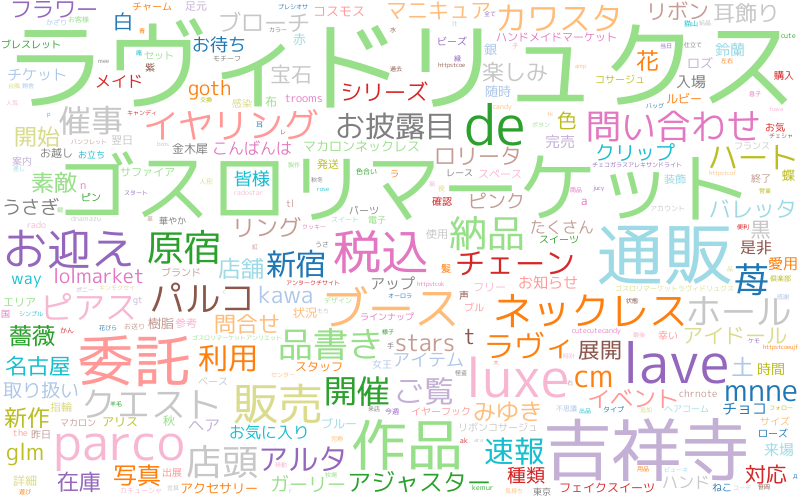

In [31]:
npt.wordcloud(
    max_words=300,
    max_font_size=100,
    colormap='tab20_r',
    stopwords=stop_list
)

In [ ]:
#co-occurrence networks
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(stopwords=stopwords, min_edge_frequency=1)

display(
    npt.node_df.head(), npt.node_df.shape,
    npt.edge_df.head(), npt.edge_df.shape
)

npt.co_network(
    title='Co-occurrence network',
)